In [1]:
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签  
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号


data=pd.read_csv('golbal.csv')
data=data.set_index('时间')
data

C:\Users\hp\anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\hp\anaconda3\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
C:\Users\hp\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


,全球平均温度
时间,
1880,10.71444
1881,10.65444
1882,10.71444
1883,10.72444
1884,10.67444
...,...
2018,11.86444
2019,11.88444
2020,11.76444


In [2]:
value=pd.DataFrame(data['全球平均温度'])

temp_df=pd.concat([value,data['全球平均温度'].rolling(window=12).mean()],axis=1)

temp_df.columns=['actual_temp','forecast_temp']
temp_df.head(12)

,actual_temp,forecast_temp
时间,,
1880,10.71444,NaN
1881,10.65444,NaN
1882,10.71444,NaN
1883,10.72444,NaN
1884,10.67444,NaN
1885,10.75444,NaN
1886,10.63444,NaN
1887,10.62444,NaN
1888,10.98444,NaN


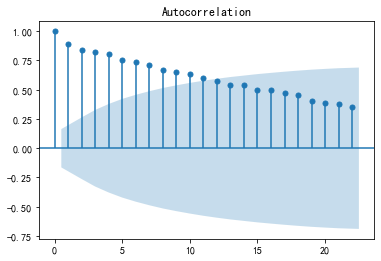

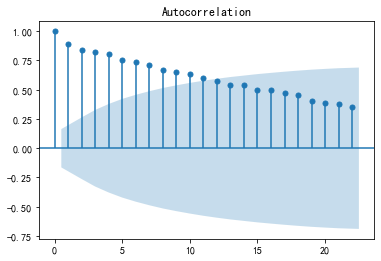

In [3]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

plot_acf(data['全球平均温度'].dropna())

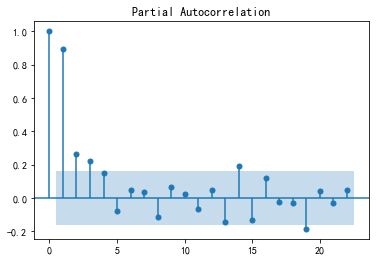

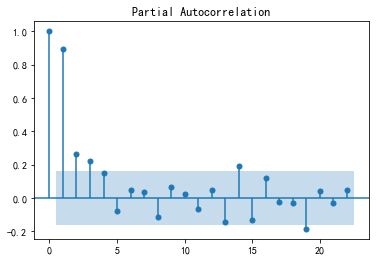

In [4]:
plot_pacf(data['全球平均温度'].dropna())

## ARIMA模型

In [5]:
# training_data=data*0.8
# test_data = data-training_data

In [6]:
# from statsmodels.tsa.arima_model import ARIMA
# arima = ARIMA(training_data,order=(2,1,3))

In [7]:
#fit the model
# model= arima.fit()

In [8]:
#predictions 
# predictions=model.forecast(steps=len(test_data))[0]
# predictions

##  LSTM模型

In [9]:
df=pd.read_csv('golbal.csv')
df.columns = ['ds', 'y']
df.head()

,ds,y
0,1880,10.71444
1,1881,10.65444
2,1882,10.71444
3,1883,10.72444
4,1884,10.67444


In [10]:
df4=df.reset_index()['y']
df4.shape

(143,)

In [11]:
df4.head()

0    10.71444
1    10.65444
2    10.71444
3    10.72444
4    10.67444
Name: y, dtype: float64

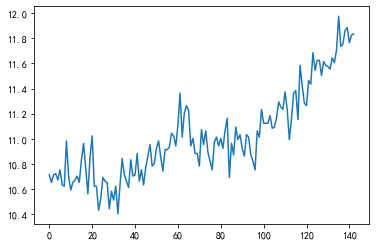

In [12]:
plt.plot(df4)

In [13]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
scaler=MinMaxScaler(feature_range=(0,1))
df4=scaler.fit_transform(np.array(df4).reshape(-1,1))

In [14]:
training_size=int(len(df4)*0.80)
test_size=len(df4)-training_size
train_data, test_data= df4[0:training_size,:], df4[training_size:len(df4),:1]

In [15]:
training_size, test_size

(114, 29)

In [16]:
def create_dataset(dataset, time_step=1):
    X,y= [],[]
    for i in range(len(dataset)-time_step-1):
        a= dataset[i:(i+time_step),0] ###i= 0, 0,1,2,3
        X.append(a)
        y.append(dataset[i+ time_step,0])
    return np.array(X), np.array(y)

In [17]:
time_step=10
X_train, y_train= create_dataset(train_data, time_step)
X_test, y_test= create_dataset(test_data, time_step)

In [18]:
print(X_train.shape), print(y_train.shape)

(103, 10)
(103,)


(None, None)

In [19]:
X_train= X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test= X_test.reshape(X_test.shape[0], X_test.shape[1],1)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model= Sequential()
model.add(LSTM(50, return_sequences= True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss= 'mean_squared_error', optimizer= 'adam')

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs= 100, batch_size=64, verbose=1)

Epoch 1/100
2/2 [==============================] - 5s 1s/step - loss: 0.1109 - val_loss: 0.5381
Epoch 2/100
2/2 [==============================] - 0s 33ms/step - loss: 0.0802 - val_loss: 0.4025
Epoch 3/100
2/2 [==============================] - 0s 34ms/step - loss: 0.0501 - val_loss: 0.2618
Epoch 4/100
2/2 [==============================] - 0s 34ms/step - loss: 0.0263 - val_loss: 0.1220
Epoch 5/100
2/2 [==============================] - 0s 33ms/step - loss: 0.0127 - val_loss: 0.0274
Epoch 6/100
2/2 [==============================] - 0s 34ms/step - loss: 0.0195 - val_loss: 0.0112
Epoch 7/100
2/2 [==============================] - 0s 30ms/step - loss: 0.0238 - val_loss: 0.0260
Epoch 8/100
2/2 [==============================] - 0s 31ms/step - loss: 0.0162 - val_loss: 0.0638
Epoch 9/100
2/2 [==============================] - 0s 32ms/step - loss: 0.0114 - val_loss: 0.1088
Epoch 10/100
2/2 [==============================] - 0s 30ms/step - loss: 0.0123 - val_loss: 0.1418
Epoch 11/100
2/2 [===

Epoch 74/100
2/2 [==============================] - 0s 33ms/step - loss: 0.0091 - val_loss: 0.0082
Epoch 75/100
2/2 [==============================] - 0s 33ms/step - loss: 0.0092 - val_loss: 0.0080
Epoch 76/100
2/2 [==============================] - 0s 30ms/step - loss: 0.0092 - val_loss: 0.0093
Epoch 77/100
2/2 [==============================] - 0s 29ms/step - loss: 0.0091 - val_loss: 0.0119
Epoch 78/100
2/2 [==============================] - 0s 29ms/step - loss: 0.0091 - val_loss: 0.0146
Epoch 79/100
2/2 [==============================] - 0s 33ms/step - loss: 0.0092 - val_loss: 0.0145
Epoch 80/100
2/2 [==============================] - 0s 31ms/step - loss: 0.0092 - val_loss: 0.0130
Epoch 81/100
2/2 [==============================] - 0s 31ms/step - loss: 0.0091 - val_loss: 0.0106
Epoch 82/100
2/2 [==============================] - 0s 30ms/step - loss: 0.0091 - val_loss: 0.0095
Epoch 83/100
2/2 [==============================] - 0s 32ms/step - loss: 0.0092 - val_loss: 0.0104
Epoch 84/1

In [23]:
from keras.models import load_model
model.save_weights('my_model1.weights.h5')
model.save('my_model1.h5')
#model= load_model('my_model1.h5')
#model.load_weights('my_model1.h5')

In [24]:
#Prediction and performance metrics check
train_predict= model.predict(X_train)
train_predict

array([[0.21748412],
       [0.21890907],
       [0.22140941],
       [0.21943735],
       [0.21663266],
       [0.21553963],
       [0.21261652],
       [0.22049074],
       [0.2305191 ],
       [0.22114356],
       [0.2273374 ],
       [0.24247089],
       [0.25223443],
       [0.25695553],
       [0.25300515],
       [0.24551128],
       [0.22763707],
       [0.20492728],
       [0.1942548 ],
       [0.19126536],
       [0.17362678],
       [0.14895414],
       [0.14592749],
       [0.14092143],
       [0.14504035],
       [0.14831889],
       [0.1472727 ],
       [0.15067339],
       [0.15545674],
       [0.17272787],
       [0.18335183],
       [0.19715182],
       [0.20735495],
       [0.22683543],
       [0.2333368 ],
       [0.22776029],
       [0.22903171],
       [0.23441134],
       [0.2454431 ],
       [0.24682865],
       [0.25545684],
       [0.265025  ],
       [0.2692052 ],
       [0.28505927],
       [0.29344806],
       [0.30657816],
       [0.31197524],
       [0.313

In [25]:
X_test

array([[[0.61146497],
        [0.62420382],
        [0.47770701],
        [0.75159236],
        [0.64968153],
        [0.56050955],
        [0.5477707 ],
        [0.67515924],
        [0.65605096],
        [0.81528662]],

       [[0.62420382],
        [0.47770701],
        [0.75159236],
        [0.64968153],
        [0.56050955],
        [0.5477707 ],
        [0.67515924],
        [0.65605096],
        [0.81528662],
        [0.72611465]],

       [[0.47770701],
        [0.75159236],
        [0.64968153],
        [0.56050955],
        [0.5477707 ],
        [0.67515924],
        [0.65605096],
        [0.81528662],
        [0.72611465],
        [0.77707006]],

       [[0.75159236],
        [0.64968153],
        [0.56050955],
        [0.5477707 ],
        [0.67515924],
        [0.65605096],
        [0.81528662],
        [0.72611465],
        [0.77707006],
        [0.77707006]],

       [[0.64968153],
        [0.56050955],
        [0.5477707 ],
        [0.67515924],
        [0.65605096],
  

In [26]:
test_predict= model.predict(X_test)
test_predict

array([[0.6162886 ],
       [0.62822974],
       [0.64309675],
       [0.6712202 ],
       [0.6769553 ],
       [0.6915517 ],
       [0.71163625],
       [0.7299245 ],
       [0.7359374 ],
       [0.74344575],
       [0.7392901 ],
       [0.74459714],
       [0.75385267],
       [0.76605535],
       [0.7850302 ],
       [0.8005911 ],
       [0.8193911 ],
       [0.8368907 ]], dtype=float32)

In [27]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
test_predict

array([[11.372013 ],
       [11.39076  ],
       [11.414103 ],
       [11.458256 ],
       [11.467259 ],
       [11.490176 ],
       [11.5217085],
       [11.550422 ],
       [11.559862 ],
       [11.57165  ],
       [11.565125 ],
       [11.573457 ],
       [11.587989 ],
       [11.607147 ],
       [11.636937 ],
       [11.661367 ],
       [11.690885 ],
       [11.718358 ]], dtype=float32)

In [28]:
from sklearn.metrics import mean_squared_error
LSTM_mSe= mean_squared_error(y_train,train_predict)
LSTM_mSe

111.92802574762804

In [29]:
LSTM_rmSe= np.sqrt(mean_squared_error(y_train,train_predict))
LSTM_rmSe

10.579604233979078

In [30]:
from sklearn.metrics import mean_absolute_error
LSTM_mAe= mean_absolute_error(y_train,train_predict)
LSTM_mAe

10.579052086612462

In [31]:
LSTM_rmAe= np.sqrt(mean_absolute_error(y_train,train_predict))
LSTM_rmAe

3.2525454780237064

In [32]:
print('LSTM Mean Squared Error: %.3f' % LSTM_mSe)
print('LSTM Mean Absolute Error: %.3f' % LSTM_mAe)
print('LSTM Root Mean Squared Error: %.3f' % LSTM_rmSe)
print('LSTM Root Mean Absolute Error: %.3f' % LSTM_rmAe)

LSTM Mean Squared Error: 111.928
LSTM Mean Absolute Error: 10.579
LSTM Root Mean Squared Error: 10.580
LSTM Root Mean Absolute Error: 3.253
